# Process data particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_clustering as plt_cp  # type: ignore
import smoothing_particles as sp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2024-10-24"

n_particles = 4
ordering = True
video_name = "23_05_23_3_1080"
x_bounds = [40, 1020]
y_bounds = [160, 1740]
x_zoom = [760, 1000]
y_zoom = [1500, 1720]

## Load tracked data

In [3]:
df_tracked = pd.read_csv("{}/clustered_{}.csv".format(output_path, video_name), low_memory=False)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,131.361102,277.047904,129.820192,282.752376,NaN,131.361102,277.047904,NaN,131.361102,277.047904,-0.284792,9039.0,12978.0,9050.0,196.579324,71.364684,0.931776,-38,4,NaN,NaN,NaN,False,False,False
1,1,0,456.948442,377.037307,457.656262,377.513295,0.0,503.000000,333.000000,0.627451,476.000000,345.000000,-1.279919,8631.0,12656.0,8636.0,165.988477,72.910703,0.898364,-22,4,NaN,NaN,NaN,False,False,False
2,2,0,164.068444,499.940035,167.470318,504.772246,NaN,164.068444,499.940035,NaN,164.068444,499.940035,0.738668,9789.0,12576.0,9829.0,187.418000,74.960595,0.916531,-20,4,NaN,NaN,NaN,False,False,False
3,3,0,1455.613066,823.843911,1456.773911,830.276236,0.0,1445.000000,738.000000,0.458824,1447.000000,749.000000,0.155444,9123.0,10618.0,9917.0,190.276157,68.388433,0.933177,-25,4,NaN,NaN,NaN,False,False,False


## Swapping mixed IDs

In [4]:
omega_threshold = 18 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 95  # Velocity per frame limited with half average size of particle
t0, tf = 0, 1500  # 0, num_frames
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

if ordering:
    df_final = sp.get_allowed_frame(
        df_tracked=df_tracked[(df_tracked["time"] >= t0) & (df_tracked["time"] <= tf)],
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        order=False
    )

Thresholds:
	- Velocity: 95 
	- Angle: 18.0 

Previous Time: 270 Dropped Current Time: 271
Previous Time: 284 Dropped Current Time: 285
Previous Time: 284 Dropped Current Time: 286
Previous Time: 284 Dropped Current Time: 287
Previous Time: 284 Dropped Current Time: 288
Previous Time: 284 Dropped Current Time: 289
Previous Time: 284 Dropped Current Time: 290
Previous Time: 284 Dropped Current Time: 291
Previous Time: 284 Dropped Current Time: 292
Previous Time: 284 Dropped Current Time: 293
Previous Time: 284 Dropped Current Time: 294
Previous Time: 284 Dropped Current Time: 295
Previous Time: 284 Dropped Current Time: 296
Previous Time: 284 Dropped Current Time: 297
Previous Time: 284 Dropped Current Time: 298
Previous Time: 284 Dropped Current Time: 299
Previous Time: 284 Dropped Current Time: 300
Previous Time: 284 Dropped Current Time: 301
Previous Time: 330 Dropped Current Time: 331
Previous Time: 330 Dropped Current Time: 332
Previous Time: 330 Dropped Current Time: 333
Previous 

In [5]:
df_final

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation,allowed_frame,permuted_id,corrected_orientation
0,0,0,131.361102,277.047904,129.820192,282.752376,NaN,131.361102,277.047904,NaN,131.361102,277.047904,-0.284792,9039.0,12978.0,9050.0,196.579324,71.364684,0.931776,-38,4,NaN,NaN,NaN,False,False,False,True,0,-0.284792
1,1,0,456.948442,377.037307,457.656262,377.513295,0.0,503.000000,333.000000,0.627451,476.000000,345.000000,-1.279919,8631.0,12656.0,8636.0,165.988477,72.910703,0.898364,-22,4,NaN,NaN,NaN,False,False,False,True,1,-1.279919
2,2,0,164.068444,499.940035,167.470318,504.772246,NaN,164.068444,499.940035,NaN,164.068444,499.940035,0.738668,9789.0,12576.0,9829.0,187.418000,74.960595,0.916531,-20,4,NaN,NaN,NaN,False,False,False,True,2,0.738668
3,3,0,1455.613066,823.843911,1456.773911,830.276236,0.0,1445.000000,738.000000,0.458824,1447.000000,749.000000,0.155444,9123.0,10618.0,9917.0,190.276157,68.388433,0.933177,-25,4,NaN,NaN,NaN,False,False,False,True,3,0.155444
4,0,1,131.236932,278.569644,129.443543,285.456741,NaN,131.236932,278.569644,NaN,131.236932,278.569644,-0.282948,9125.0,13383.0,9130.0,200.439365,71.376005,0.934449,-28,4,-0.124170,1.521740,0.001844,False,False,False,True,0,-0.282948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,3,1499,98.967011,869.101482,105.318318,867.216288,NaN,98.967011,869.101482,NaN,98.967011,869.101482,0.080043,7154.0,28261.0,7167.0,142.865809,131.158110,0.396462,-22,4,17.972894,7.564000,-0.080583,False,False,False,True,3,0.080043
6002,2,1500,198.261952,791.760952,200.777533,789.598800,0.0,239.000000,734.000000,0.631373,221.000000,751.000000,-0.867399,4497.0,6820.0,4504.0,136.909422,47.682687,0.937391,-19,4,-0.624391,0.229454,0.008289,False,False,False,True,0,-0.867399
6001,1,1500,198.072899,355.362549,200.042437,354.184897,0.0,254.000000,239.000000,0.588235,217.000000,273.000000,-0.484612,10782.0,14281.0,10795.0,216.164406,80.636859,0.927817,-58,4,-0.089431,0.387839,0.000909,False,False,False,True,1,-0.484612
6000,0,1500,377.793303,172.325204,377.714785,173.034986,0.0,440.000000,130.000000,0.568627,390.000000,152.000000,-1.442225,7586.0,10807.0,7649.0,174.715089,70.038356,0.916134,-16,4,15.450084,-12.269934,-0.245815,False,False,False,True,2,-1.442225


## Interpolation over not allowed frames

In [6]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:,"permuted_id"]==df_full["permuted_id"].unique()[id_]
        df_full[mask]=df_full[mask].interpolate(method="linear")

In [7]:
if ordering:
    df_temp = df_full[["id", "permuted_id", "time", "position_x", "position_y", "orientation"]]
    df_temp.to_csv("{}/interpolated_{}.csv".format(output_path, video_name), index=False)
    df_temp

Thresholds:
	- Velocity: 17.878165113496248 
	- Angle: 36.33982599078086 



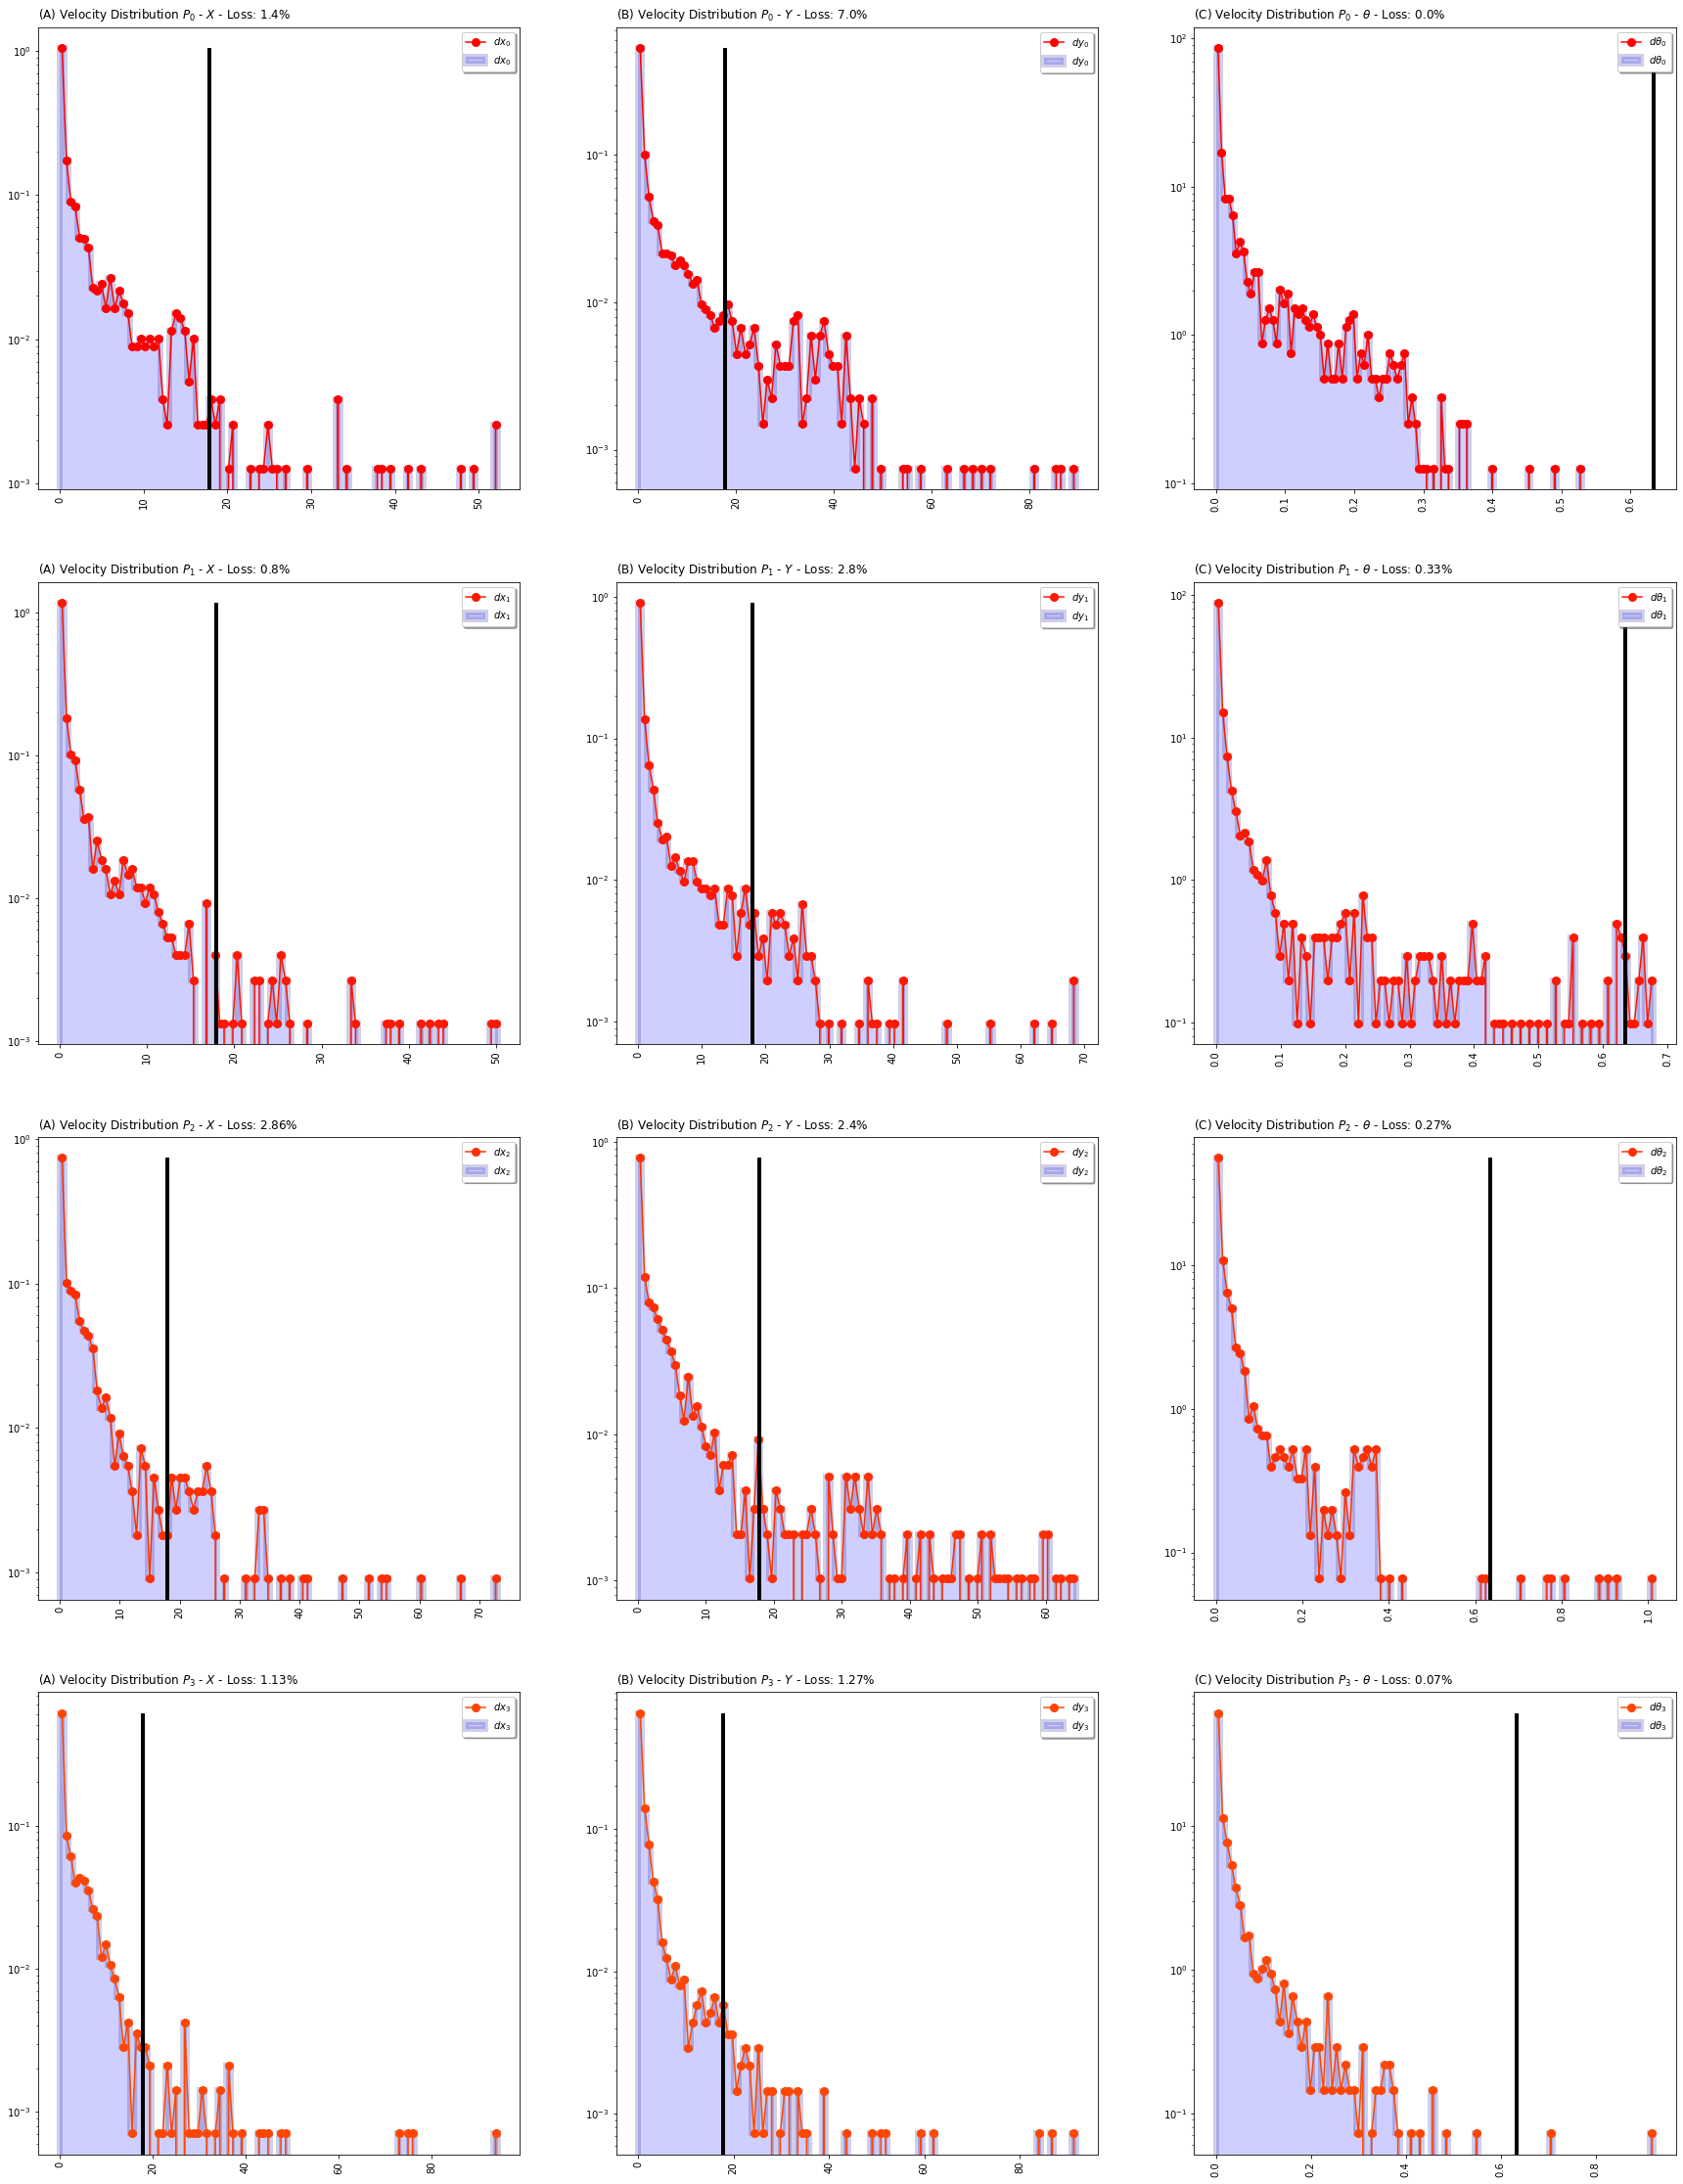

In [8]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = df_full["velocity_orientation"].abs().quantile(0.9965) # Angular velocity per frame
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend
    )

All


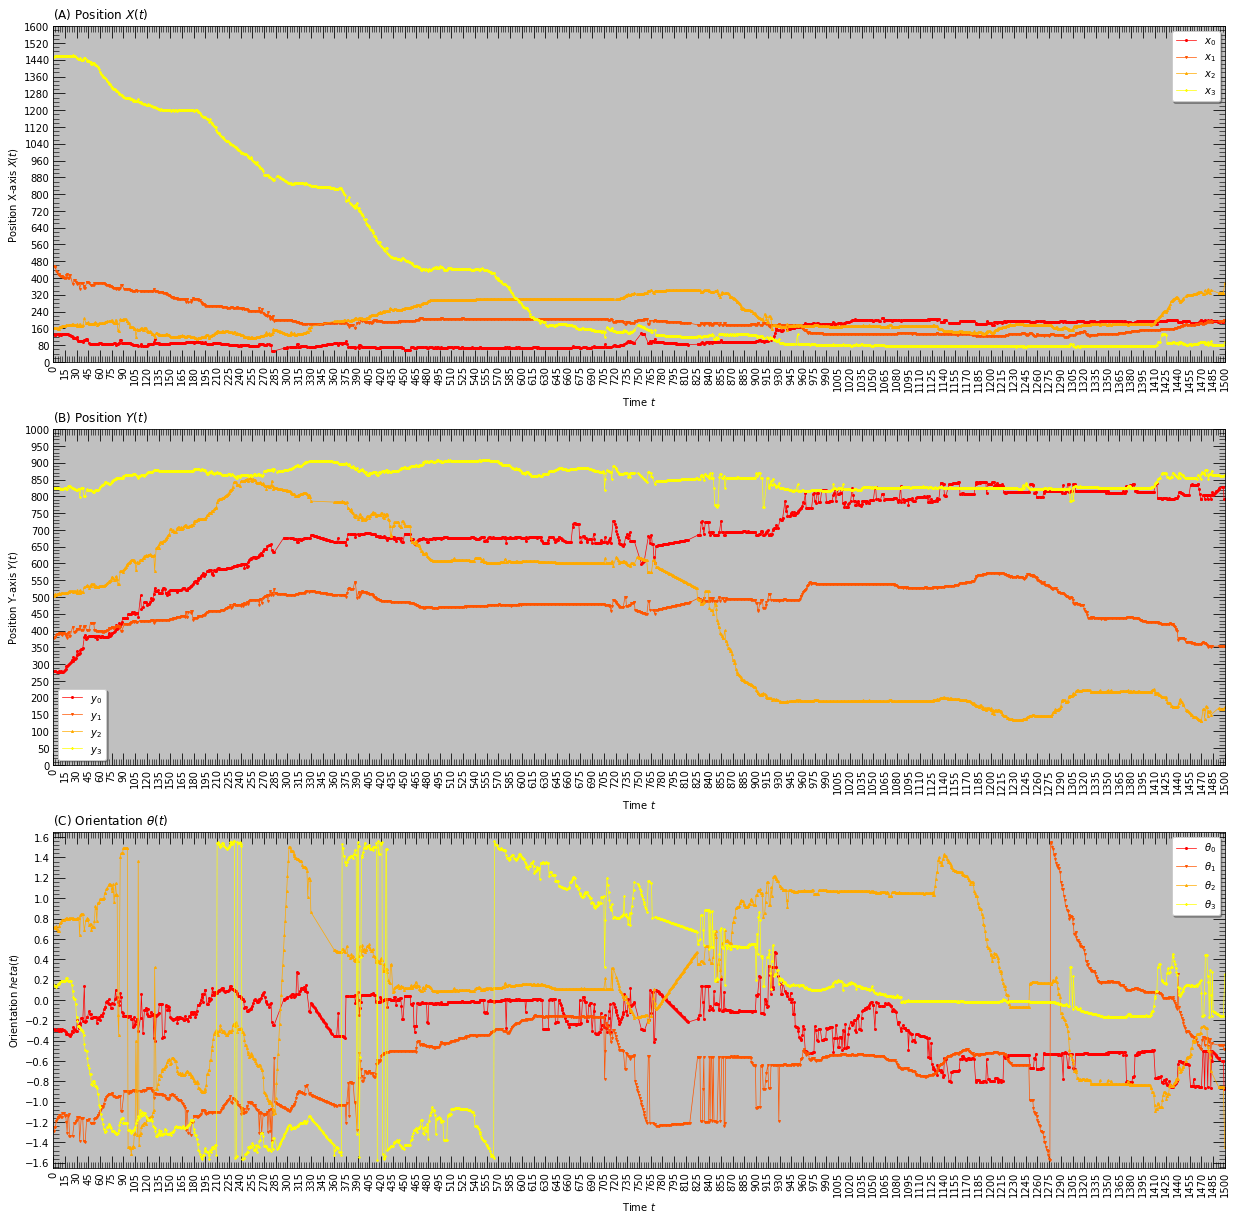

Zoom


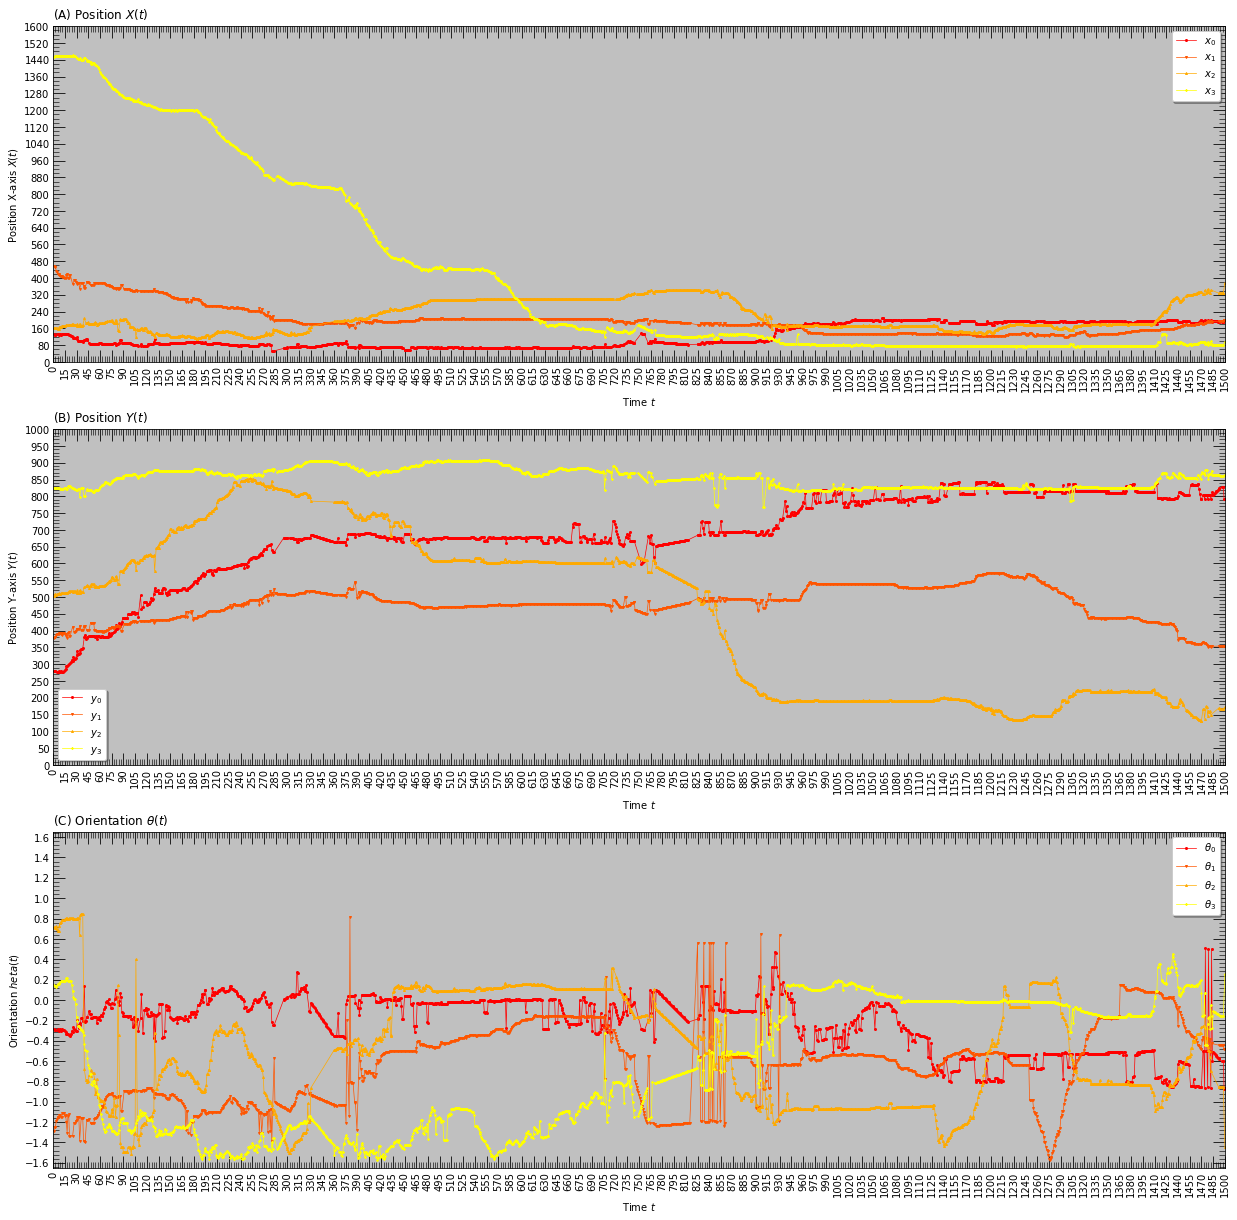

In [9]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 1500
    t0_ = 12000
    tf_ = 14000
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1600], [0, 1000], [-1.65, 1.65]]
    fancy_legend = True

    print("All")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

    print("Zoom")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

In [10]:
df_smooth = df_full.copy()
df_smooth["id"] = df_smooth["permuted_id"]
print(np.cos(df_smooth[((df_smooth["time"] >= 208) & (df_smooth["time"] <= 210) & (df_smooth.permuted_id==3))]["orientation"].values))
print(np.sin(df_smooth[((df_smooth["time"] >= 208) & (df_smooth["time"] <= 210) & (df_smooth.permuted_id==3))]["orientation"].values))
df_smooth[((df_smooth["time"] >= 208) & (df_smooth["time"] <= 215) & (df_smooth.permuted_id==3))].sort_values(["permuted_id", "time"])

[0.14182946 0.04520319 0.03138033]
[-0.98989111 -0.99897781  0.99950752]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation,allowed_frame,permuted_id,corrected_orientation
835,3,208,1118.381358,868.571672,1108.475913,870.331312,0.0,1127.0,829.0,0.576471,1110.0,895.0,-1.428487,8218.0,10549.0,8247.0,169.530055,70.613276,0.909125,-45,4,-0.131397,0.017907,0.000358,False,False,False,True,3,-1.428487
839,3,209,1106.351152,868.348996,1094.655799,869.159253,0.0,1125.0,830.0,0.639216,1159.0,884.0,-1.525578,8811.0,11302.0,8837.0,179.709598,73.347773,0.912917,-47,4,-12.030206,-0.222676,-0.097091,False,False,False,True,3,-1.525578
843,3,210,1097.315930,871.004016,1085.450425,870.809795,0.0,1043.0,834.0,0.615686,1110.0,875.0,1.539411,8964.0,11353.0,8995.0,180.677938,74.160629,0.911880,-51,4,-9.035222,2.655020,0.013833,False,False,True,True,3,-1.539411
847,3,211,1093.483617,869.738865,1081.369803,869.640469,0.0,1105.0,832.0,0.619608,1022.0,882.0,1.551492,9003.0,11534.0,9025.0,181.014151,74.402506,0.911621,-49,4,-3.832314,-1.265151,0.012081,False,False,False,True,3,-1.551492
851,3,212,1089.848107,868.937076,1077.240671,868.607237,0.0,1042.0,832.0,0.788235,1137.0,879.0,1.529344,9138.0,11462.0,9211.0,182.351397,74.638497,0.912395,-50,4,-3.635510,-0.801789,-0.022148,False,False,False,True,3,-1.529344
855,3,213,1089.713423,869.046976,1076.892771,868.790689,0.0,1042.0,832.0,0.807843,1025.0,881.0,1.527399,9111.0,11378.0,9180.0,182.576706,74.307240,0.913432,-47,4,-0.134683,0.109900,-0.001945,False,False,False,True,3,-1.527399
859,3,214,1081.718412,869.011222,1066.740514,868.235923,0.0,1036.0,832.0,0.603922,1121.0,881.0,1.503485,9624.0,12138.0,9669.0,200.526114,72.861249,0.931653,-64,4,-7.995011,-0.035754,-0.023914,False,False,False,True,3,-1.503485
863,3,215,1076.159287,866.419947,1060.730908,865.717615,0.0,1036.0,828.0,0.611765,1160.0,872.0,1.516142,9756.0,12343.0,9776.0,203.258454,72.641553,0.933957,-49,4,-5.559126,-2.591275,0.012657,False,False,False,True,3,-1.516142


## Setting video information

In [11]:
# Load the video
reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# Check the number of frames
num_frames = reader.count_frames()
print("Total frames: {}".format(num_frames))

# Extract a frame to inspect the content
time = 0
frame = reader.get_data(time)
print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 90650
Frames resolution: 1080 x 1920


## Comparative of process

time: 208 id: 0 T: -63.3048 C: -63.3048 S:3.8934
time: 209 id: 0 T: -63.3913 C: -63.3913 S:4.1223
time: 210 id: 0 T: -63.3907 C: -63.3907 S:4.0459
time: 208 id: 1 T: 3.8934 C: 3.8934 S:-63.3048
time: 209 id: 1 T: 4.1223 C: 4.1223 S:-63.3913
time: 210 id: 1 T: 4.0459 C: 4.0459 S:-63.3907
time: 208 id: 2 T: -18.0377 C: -18.0377 S:-18.0377
time: 209 id: 2 T: -16.877 C: -16.877 S:-16.877
time: 210 id: 2 T: -18.5696 C: -18.5696 S:-18.5696
time: 208 id: 3 T: -81.8463 C: -81.8463 S:-81.8463
time: 209 id: 3 T: -87.4092 C: -87.4092 S:-87.4092
time: 210 id: 3 T: 88.2017 C: 88.2017 S:-88.2017


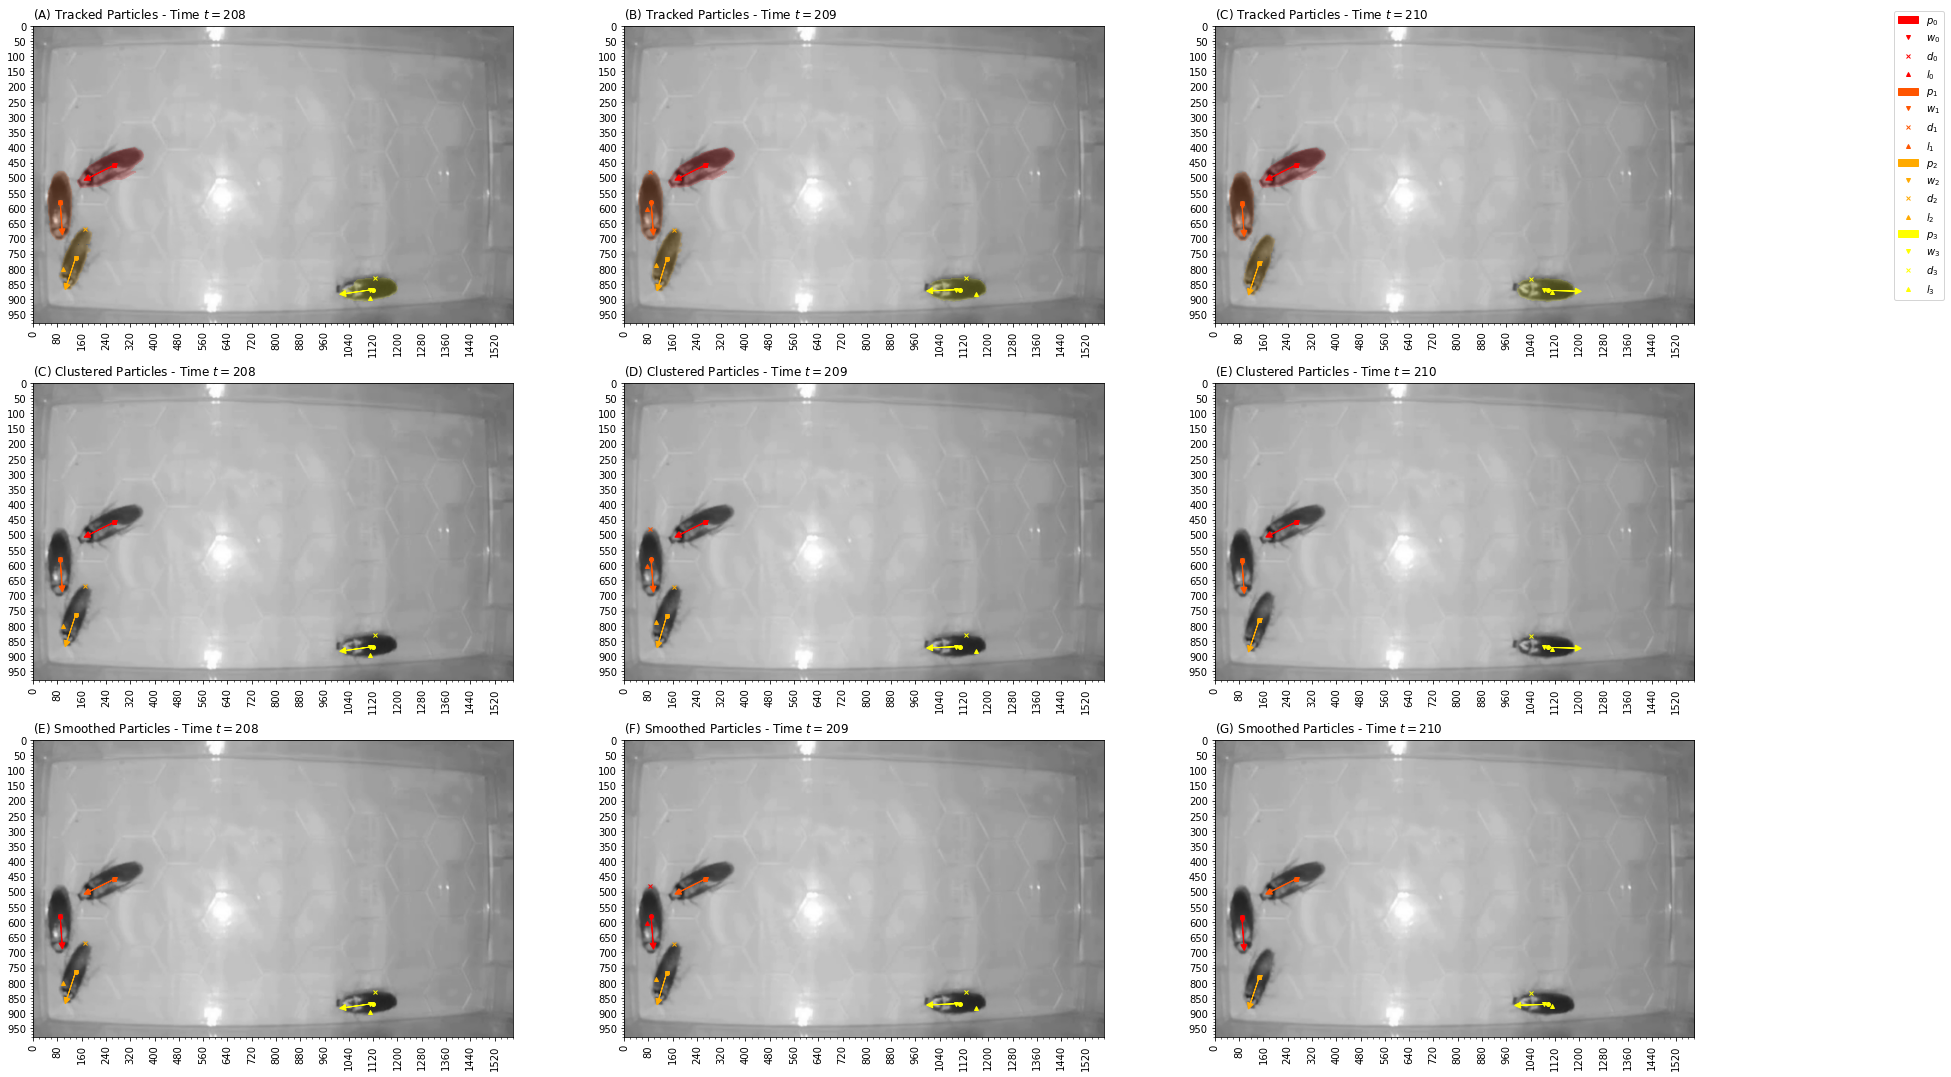

In [12]:
# Original frame
time = 209  #271  # 209  # 80
times = [time - 1, time, time + 1]
reinforce_boundaries = True
remove_holes = False
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 1.5
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99


df_tracked_frame_0 = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[times[0], reader.get_data(times[0])]
)

df_tracked_frame_1 = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[times[1], reader.get_data(times[1])]
)

df_tracked_frame_2 = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[times[2], reader.get_data(times[2])]
)

df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

width = 10
n_x_breaks = 20
n_y_breaks = 20
fancy_legend = True
x_legend = 1.001
y_legend = 0.891

from importlib import reload
reload(plt_sp)

df_smooth = df_full.copy()
df_smooth["id"] = df_smooth["permuted_id"]
df_smooth["orientation"] = df_smooth["corrected_orientation"]

fig = plt_sp.plot_all_process_frame(
    reader=reader,
    times=times,
    df_tracked=df_tracked_old,
    df_clustered=df_tracked,
    df_smoothed=df_smooth,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## TODO

In [13]:
# Head - Bump Orientation (Postprocess using angle changes of interpolated data)

##### SOLVED #####
# Delete incorrect tracked frames in the algorithm (Manual)
#   Search the persistent long jumps, i.e, after the first permutation if the long jumps persist, drop frame (Automatic)
# Interpolate over deleted IDs